Import libraries

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from utils import load_pickle, load_json

Settings

In [2]:
dataset = "massspecgym"
split = "scaffold_vanilla"

folder = "../FP_prediction/mist/best_models"
main_model_folder = os.path.join(folder, dataset)
main_model_folder = [os.path.join(main_model_folder, f) for f in os.listdir(main_model_folder) if split in f][0]
no_sampling_score = round(load_json(os.path.join(main_model_folder, "test_performance.json"))["jaccard"], 3)

all_results = {"random": {100: no_sampling_score}, "IF": {100: no_sampling_score}} 

random_models_folder = os.path.join(folder, f"{dataset}_sampled_random", split)
sampling_models_folder = os.path.join(folder, f"{dataset}_sampled_remove_top_k_harmful", split)

for f in os.listdir(random_models_folder):

    score = round(load_json(os.path.join(random_models_folder, f, "test_performance.json"))["jaccard"], 3)
    all_results["IF"][int(f.split("_")[6])] = score 

for f in os.listdir(sampling_models_folder):
    score = round(load_json(os.path.join(sampling_models_folder, f, "test_performance.json"))["jaccard"], 3)
    all_results["random"][int(f.split("_")[6])] = score 

print(sorted(all_results["random"].items(), key = lambda x: x[0]))
print(sorted(all_results["IF"].items(), key = lambda x: x[0]))

[(5, 0.264), (30, 0.261), (50, 0.261), (70, 0.261), (75, 0.261), (80, 0.264), (85, 0.264), (90, 0.261), (100, 0.273)]
[(1, 0.208), (5, 0.228), (10, 0.242), (30, 0.262), (50, 0.264), (70, 0.277), (90, 0.286), (100, 0.273)]


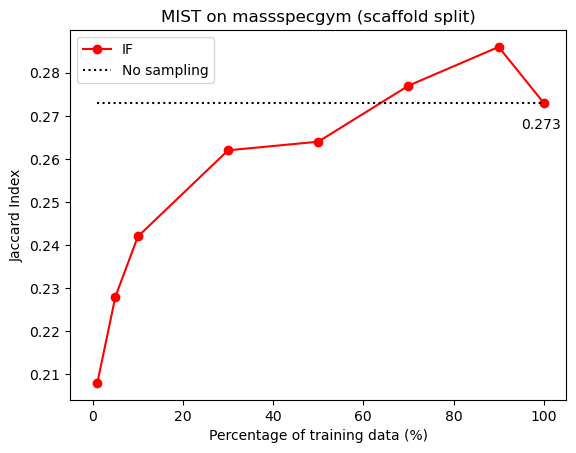

In [5]:
x_values = sorted(list(all_results["IF"].keys()))

# random = [all_results["random"][x] for x in x_values]
IF = [all_results["IF"][x] for x in x_values]
full = [all_results["random"][100] for _ in x_values]

if split == "scaffold_vanilla": split_text = "scaffold split"
if split == "inchikey_vanilla": split_text = "inchikey split"
plt.title(f"MIST on {dataset} ({split_text})")

plt.xlabel("Percentage of training data (%)")
plt.ylabel("Jaccard Index")
plt.xlim(-5, 105)

plt.plot(x_values, IF, label = "IF", color = "red", marker = "o")
# plt.plot(x_values, IF, label = "Random", marker = "o")
plt.plot(x_values, full, label = "No sampling", linestyle = "dotted", color = "black")
plt.annotate(full[0], (95, full[0] - 0.006))

plt.legend()
plt.show()